In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# kids 1000

In [2]:
kids = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/kids1000_psf_catalog.h5')

In [3]:
kids['stars'].keys()

<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'fov_x', 'fov_y', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra']>

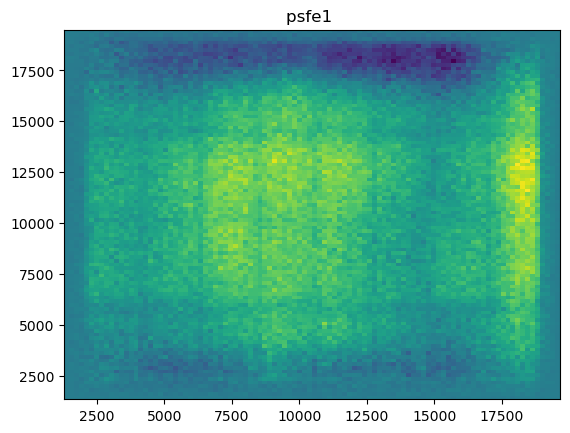

In [4]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),weights=kids['stars/measured_e1'][:])
plt.title('psfe1 ')
plt.show()

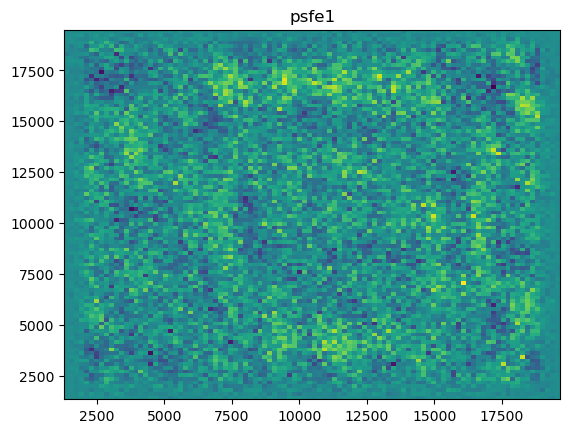

In [5]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),weights=kids['stars/measured_e1'][:]-kids['stars/model_e1'][:])
plt.title('psfe1')
plt.show()

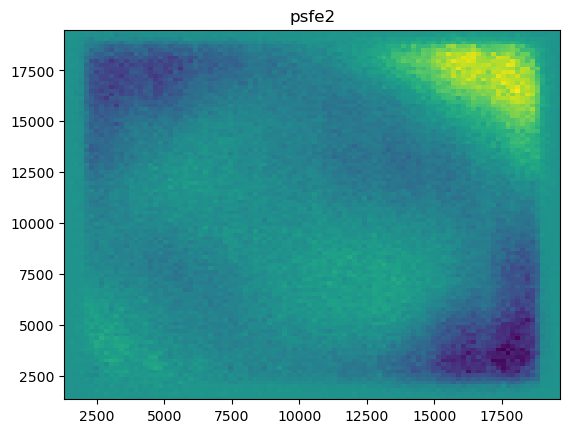

In [6]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),
           weights=kids['stars/measured_e2'][:])
plt.title('psfe2')
plt.show()

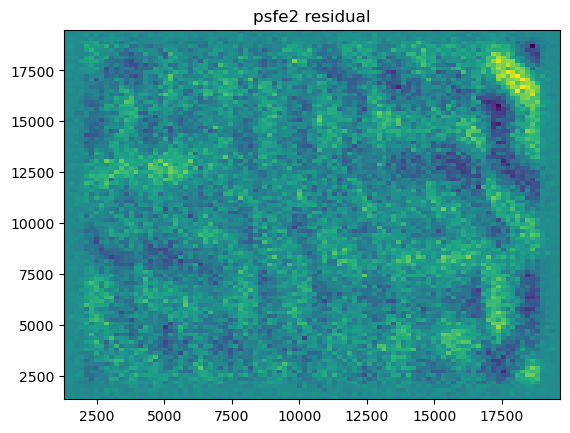

In [7]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),
           weights=kids['stars/measured_e2'][:]-kids['stars/model_e2'][:])
plt.title('psfe2 residual')
plt.show()

In [74]:
e1 = kids['stars/measured_e1'][:]
e2 = kids['stars/measured_e2'][:]
de1 = e1 - kids['stars/model_e1'][:]
de2 = e2 - kids['stars/model_e2'][:]
fov_x = kids['stars/fov_x'][:]
fov_y = kids['stars/fov_y'][:]

weights = [e1,e2,de1*10,de2*10]

labels = [r'e$_1$',r'e$_2$',r'res [$\times 10$]',r'res [$\times 10$]'] #[$\times 10$]

In [75]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm


cmap=cm.seismic


In [76]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    Hnorm.append(Hw/H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

/tmp/ipykernel_1533054/1590435865.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


In [91]:
np.shape(Hnorm)


(4, 100, 100)

In [94]:
vmin,vmax = min(np.nanmin(h)), max(np.nanmax(h)) for h in Hnorm

SyntaxError: invalid syntax (2580762560.py, line 1)

In [90]:
print(len(Hnorm[0][Hnorm[0]==]))

NameError: name 'nan' is not defined

Text(0.5, 0.98, 'KiDS ')

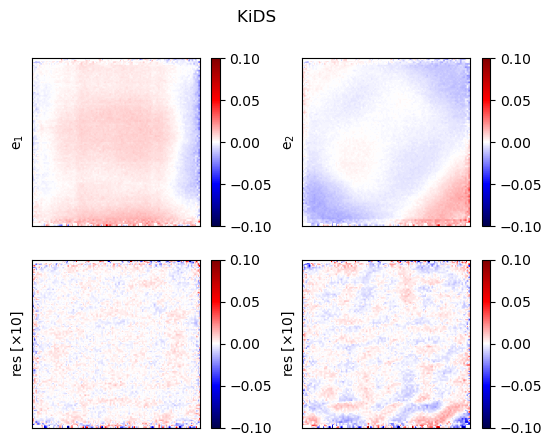

In [81]:
for i,l in zip(range(0,4),labels):
    plt.subplot(2,2,i+1)
    #Hw, _, _, = np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    #H, _, _, = np.histogram2d(fov_x, fov_y, bins=(100,100))
    im = plt.imshow(Hnorm[i],cmap=cmap,vmin=vmin,vmax=vmax)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
'''    
plt.subplots_adjust(left=0.1,right=0.9)
cax = plt.axes([0.9, 0.15, 0.05, 0.7])
plt.colorbar(im,cax=cax)
'''
plt.suptitle('KiDS ')

/tmp/ipykernel_1533054/3170226384.py:5: RuntimeWarning: invalid value encountered in divide
  im = plt.imshow(Hw/H,cmap=cmap,vmin=vmin,vmax=vmax)#, vmin=-10, vmax=10)


Text(0.5, 0.98, 'KiDS ')

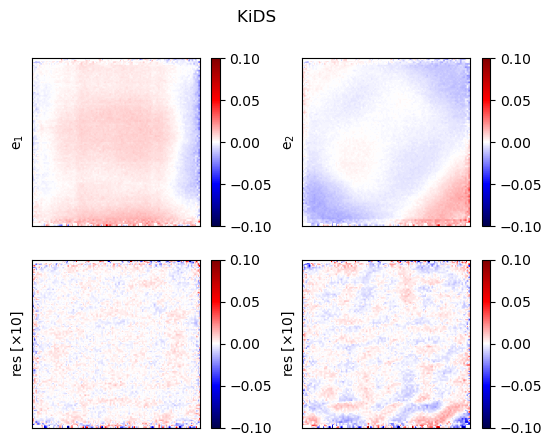

In [68]:
for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    Hw, _, _, = np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _, = np.histogram2d(fov_x, fov_y, bins=(100,100))
    im = plt.imshow(Hw/H,cmap=cmap,vmin=vmin,vmax=vmax)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
#plt.subplots_adjust(left=0.1,right=0.9)
#cax = plt.axes([0.9, 0.15, 0.05, 0.7])
#plt.colorbar(im,cax=cax)

plt.suptitle('KiDS ')

# DES y1

In [47]:
y1 = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_psf_catalog.hdf5','r')



In [62]:
e1 = y1['stars/measured_e1'][:]
e2 = y1['stars/measured_e2'][:]
de1 = e1 - y1['stars/model_e1'][:]
de2 = e2 - y1['stars/model_e2'][:]
fov_x = y1['stars/fov_x'][:]
fov_y = y1['stars/fov_y'][:]

weights = [e1,e2,de1*10,de2*10]

labels = [r'e$_1$',r'e$_2$',r'res *10',r'res *10'] #[$\times 10$]

/tmp/ipykernel_1533054/3049369568.py:5: RuntimeWarning: invalid value encountered in divide
  im = plt.imshow(Hw/H,cmap=cmap)#,norm=norm)#, vmin=-10, vmax=10)


Text(0.5, 0.98, "DES, normalized via chihway's suggestion")

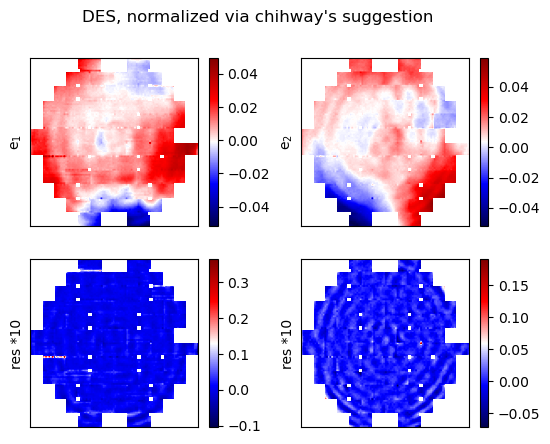

In [63]:

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    im = plt.imshow(Hw/H,cmap=cmap)#,norm=norm)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("DES, normalized via chihway's suggestion")


In [55]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _ = np.histogram2d(fov_x, fov_y, bins=(100,100))
    Hnorm.append(Hw/H)
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

/tmp/ipykernel_1533054/1968869529.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

/tmp/ipykernel_1533054/2265501261.py:5: RuntimeWarning: invalid value encountered in divide
  im = plt.imshow(Hw/H,cmap=cmap,norm=norm)#, vmin=-10, vmax=10)


Text(0.5, 0.98, 'normalized')

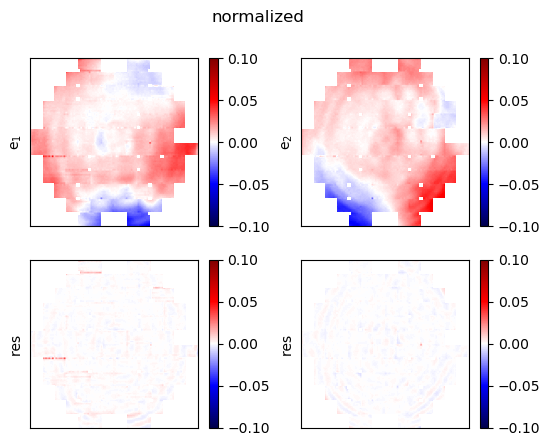

In [56]:

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _=np.histogram2d(fov_x, fov_y, bins=(100,100))
    im = plt.imshow(Hw/H,cmap=cmap,norm=norm)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("normalized")

/tmp/ipykernel_1533054/1206949217.py:5: RuntimeWarning: invalid value encountered in divide
  Hnorm.append(Hw/H)
/tmp/ipykernel_1533054/1206949217.py:15: RuntimeWarning: invalid value encountered in divide
  im = plt.imshow(Hw/H,cmap=cmap,norm=None, vmin=vmin, vmax=vmax)


Text(0.5, 0.98, '')

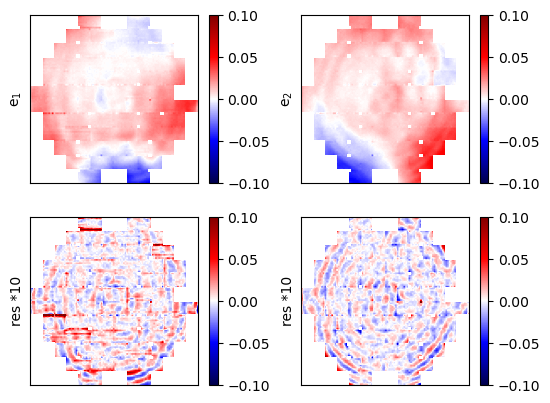

In [64]:
Hnorm = []
for w in weights:
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    Hnorm.append(Hw/H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
#norm = Normalize(vmin=vmin, vmax=vmax)

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    im = plt.imshow(Hw/H,cmap=cmap,norm=None, vmin=vmin, vmax=vmax)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("")

In [ ]:
Hnorm = []
for w in weights:
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=False)
    Hnorm.append(H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=False)
    im = plt.imshow(H,cmap=cmap,norm=None)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("not normalized, density=False")